## Installing and Importing Dependencies

In [1]:
!pip install easyocr
!pip install imutils

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## Reading the image and converting to grayscale

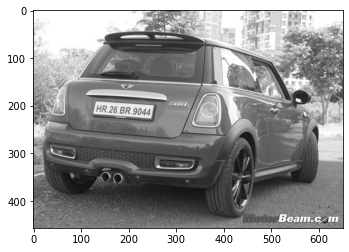

In [68]:
img = cv2.imread('image1.jpg') # Reads image from the system
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts to Grayscale image
plt.imshow(cv2.cvtColor(grayimg, cv2.COLOR_BGR2RGB))

## Applying bilateralFilter and finding edges

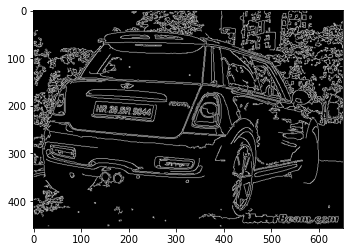

In [69]:
filterimg = cv2.bilateralFilter(grayimg, 11, 17, 17) # Filtering the image to reduce background noise
edged = cv2.Canny(filterimg, 30, 200) # Helps us to detect edges
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Finding contours and applying masking

In [70]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [71]:
location = None
for contour in contours:
    apx = cv2.approxPolyDP(contour, 10, True) # Approximating the shape of the contour
    if len(apx) == 4:
        location = apx
        break

In [72]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [73]:
mask = np.zeros(grayimg.shape, np.uint8)
croppedimg = cv2.drawContours(mask, [location], 0,255, -1)
croppedimg = cv2.bitwise_and(img, img, mask=mask)

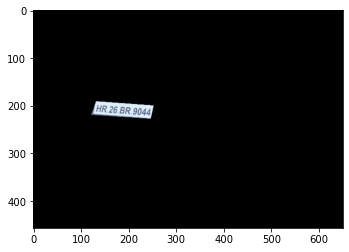

In [74]:
plt.imshow(cv2.cvtColor(croppedimg, cv2.COLOR_BGR2RGB))

In [75]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
finalimg = grayimg[x1:x2+1, y1:y2+1]

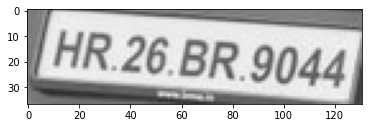

In [76]:
plt.imshow(cv2.cvtColor(finalimg, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [79]:
reader = easyocr.Reader(['en'])
result = reader.readtext(finalimg)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

## 5. Render Result

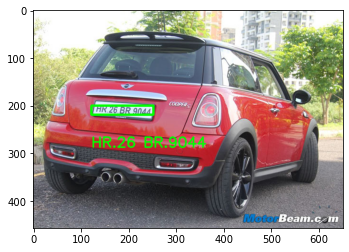

In [80]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(apx[0][0][0], apx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(apx[0][0]), tuple(apx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))